In [8]:
import sys

sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
# sys.path.append("C:/Users/your-username/AppData/Local/Programs/Python/Python312/Lib/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt 
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files


In [12]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("cali_files/bitonic_cali/*.cali"))

AttributeError: module 'thicket' has no attribute 'Thicket'

View Calltree


In [5]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.035 main
└─ 0.011 whole_computation
   ├─ 0.000 master_initialization
   ├─ 0.009 master_send_recieve
   ├─ 0.002 worker_calculation
   ├─ 0.002 worker_recieve
   └─ 0.000 worker_send

Legend (Metric: Avg time/rank Min: 0.00 Max: 1.04 indices: {'profile': 170336558})
█ 0.93 - 1.04
█ 0.72 - 0.93
█ 0.52 - 0.72
█ 0.31 - 0.52
█ 0.10 - 0.31
█ 0.00 - 0.10

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `matrix_size` in the Thicket metadata table.


In [6]:
tk.metadata_column_to_perfdata("algorithm")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("num_procs")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "algorithm", "input_size", "input_type", "num_procs"]).sort_index()

tk.dataframe.head()

profile  nid  \
node                                 num_procs matrix_size                    
{'name': 'main', 'type': 'function'} 2         128          3146970658  1.0   
                                               1024         2896985760  1.0   
                                               8192          238143674  1.0   
                                     4         128          3434837044  1.0   
                                               1024         4288893745  1.0   

                                                             spot.channel  \
node                                 num_procs matrix_size                  
{'name': 'main', 'type': 'function'} 2         128          regionprofile   
                                               1024         regionprofile   
                                               8192         regionprofile   
                                     4         128          regionprofile   
                                               1024         regionprofile   

                                                            Min time/rank  \
node                                 num_procs matrix_size                  
{'name': 'main', 'type': 'function'} 2         128               0.764383   
                                               1024             11.318082   
                                               8192          15534.322106   
                                     4         128               1.107847   
                                               1024              3.829127   

                                                            Max time/rank  \
node                                 num_procs matrix_size                  
{'name': 'main', 'type': 'function'} 2         128               0.764475   
                                               1024             11.318530   
                                               8192          15534.404717   
                                     4         128               1.115366   
                                               1024              4.191686   

                                                            Avg time/rank  \
node                                 num_procs matrix_size                  
{'name': 'main', 'type': 'function'} 2         128               0.764429   
                                               1024             11.318306   
                                               8192          15534.363411   
                                     4         128               1.111382   
                                               1024              4.024770   

                                                              Total time  \
node                                 num_procs matrix_size                 
{'name': 'main', 'type': 'function'} 2         128              1.528859   
                                               1024            22.636612   
                                               8192         31068.726823   
                                     4         128              4.445529   
                                               1024            16.099081   

                                                            Min time/rank (exc)  \
node                                 num_procs matrix_size                        
{'name': 'main', 'type': 'function'} 2         128                     0.739488   
                                               1024                    1.226359   
                                               8192                    0.544061   
                                     4         128                     1.097051   
                                               1024                    0.686677   

                                                            Max time/rank (exc)  \
node                                 num_procs matrix_size                        
{'name': 'main', 'type': 'function'} 2         128                  

In [5]:
tk.dataframe

profile  \
node                                               num_procs matrix_size               
{'name': 'main', 'type': 'function'}               2         128          3146970658   
                                                             1024         2896985760   
                                                             8192          238143674   
                                                   4         128          3434837044   
                                                             1024         4288893745   
                                                             8192         2762115125   
                                                   8         128           170336558   
                                                             1024         4202622048   
                                                             8192          680573911   
                                                   16        128           458074348   
                                                             1024          802824523   
                                                             8192         1068444857   
                                                   32        128          3258936128   
                                                             1024         1325292579   
                                                             8192          815878636   
                                                   64        128          2875060761   
                                                             1024         3263988617   
                                                             8192         3858665200   
{'name': 'whole_computation', 'type': 'function'}  2         128          3146970658   
                                                             1024         2896985760   
                                                             8192          238143674   
                                                   4         128          3434837044   
                                                             1024         4288893745   
                                                             8192         2762115125   
                                                   8         128           170336558   
                                                             1024         4202622048   
                                                             8192          680573911   
                                                   16        128           458074348   
                                                             1024          802824523   
                                                             8192         1068444857   
                                                   32        128          3258936128   
                                                             1024         1325292579   
                                                             8192          815878636   
                                                   64        128          2875060761   
                                                             1024         3263988617   
                                                             8192         3858665200   
{'name': 'master_initialization', 'type': 'func... 2         128          3146970658   
                                                             1024         2896985760   
                                                             8192          238143674   
                                                   4         128          3434837044   
                                                             1024         4288893745   
                                                             8192         2762115125   
                                                   8         128           170336558   
                                                             1024         4202622048   
                             

In [7]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:region.count,spot:time.exclusive,user,launchdate,libraries,cmdline,cluster,num_procs,matrix_size,program_name,matrix_datatype_size,MPI_Reduce-whole_computation_time,MPI_Reduce-master_initialization_time,MPI_Reduce-master_send_receive_time,MPI_Reduce-worker_receive_time_max,MPI_Reduce-worker_receive_time_min,MPI_Reduce-worker_recieve_time_average,MPI_Reduce-worker_calculation_time_max,MPI_Reduce-worker_calculation_time_min,MPI_Reduce-worker_calculation_time_average,MPI_Reduce-worker_send_time_max,MPI_Reduce-worker_send_time_min,MPI_Reduce-worker_send_time_average
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
170336558,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,128-8.cali,true,true,kelvinzheng-21,1727189635,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 128]",c,8,128,master_worker_matrix_multiplication,8,0.015276,0.000300,0.0,0.005864,0.000801,0.001807,0.001911,0.001393,0.001765,0.000056,0.000027,0.000040
238143674,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,8192-2.cali,true,true,kelvinzheng-21,1727208116,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 8192]",c,2,8192,master_worker_matrix_multiplication,8,15497.371175,0.627740,0.0,1.161893,1.161893,1.161893,15495.980711,15495.980711,15495.980711,0.146988,0.146988,0.146988
458074348,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,128-16.cali,true,true,kelvinzheng-21,1727189735,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 128]",c,16,128,master_worker_matrix_multiplication,8,0.023817,0.000269,0.0,0.018745,0.001294,0.008665,0.000756,0.000616,0.000679,0.000040,0.000026,0.000033
680573911,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,8192-8.cali,true,true,kelvinzheng-21,1727196341,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 8192]",c,8,8192,master_worker_matrix_multiplication,8,2219.581072,0.618229,0.0,1.851859,0.906718,1.428711,2218.280852,2095.089765,2123.843337,0.038176,0.022928,0.032761
802824523,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,1024-16.cali,true,true,kelvinzheng-21,1727190782,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 1024]",c,16,1024,master_worker_matrix_multiplication,8,0.767481,0.010825,0.0,0.047971,0.016014,0.033522,0.713635,0.638933,0.671929,0.000852,0.000209,0.000300
815878636,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,8192-32.cali,true,true,kelvinzheng-21,1727204985,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 8192]",c,32,8192,master_worker_matrix_multiplication,8,570.994681,0.623968,0.0,4.733922,0.875775,2.843274,566.602666,472.763667,538.814411,0.041149,0.005688,0.011913
1068444857,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,8192-16.cali,true,true,kelvinzheng-21,1727208116,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 8192]",c,16,8192,master_worker_matrix_multiplication,8,1090.739489,0.620931,0.0,2.609891,0.880790,1.832175,1089.681601,1050.803928,1068.928714,0.022494,0.011542,0.020921
1325292579,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,1024-32.cali,true,true,kelvinzheng-21,1727190935,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 1024]",c,32,1024,master_worker_matrix_multiplication,8,0.410387,0.010710,0

In [18]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
array_size = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
input_types = ["sorted", "random", "reverse", "perturbed"]

In [37]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7),
        grid=True
    )
    return plot

In [11]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

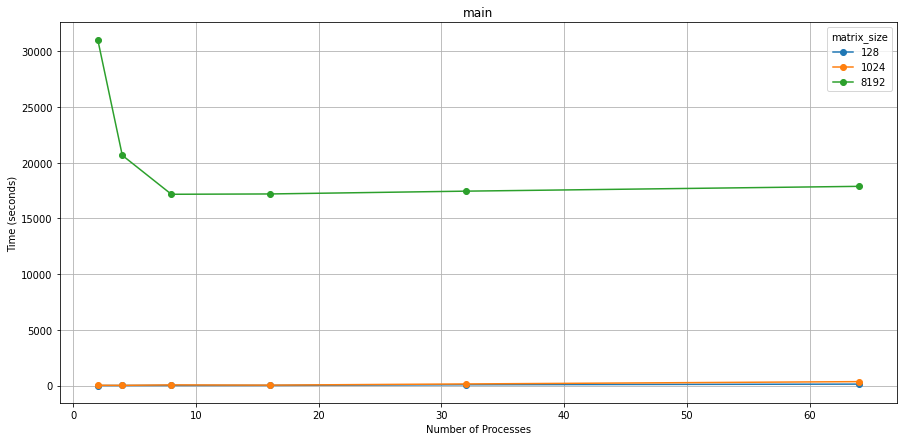

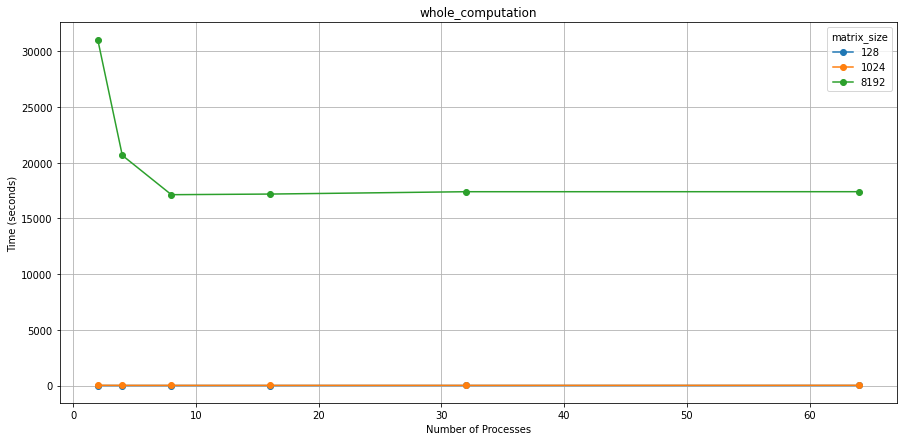

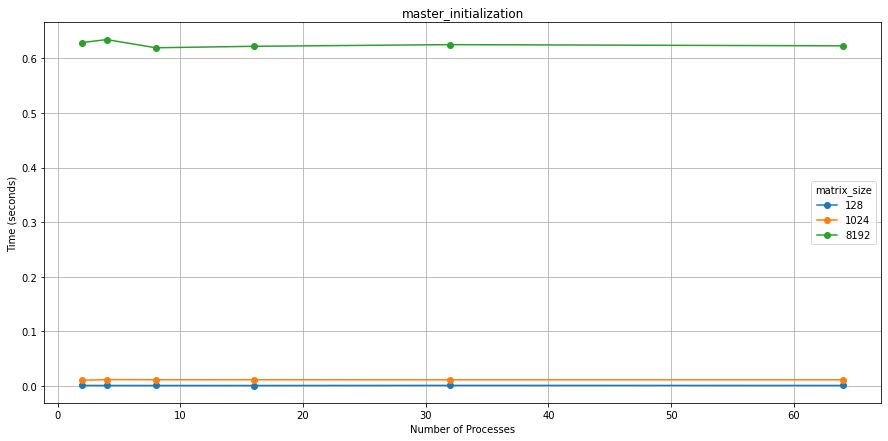

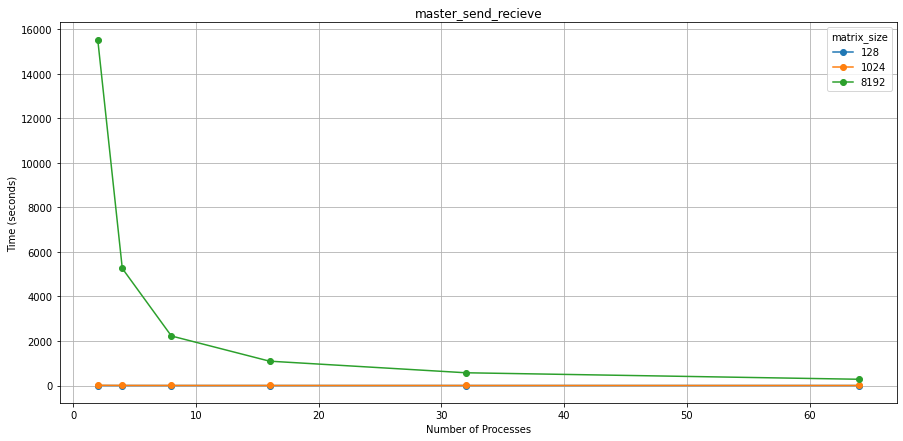

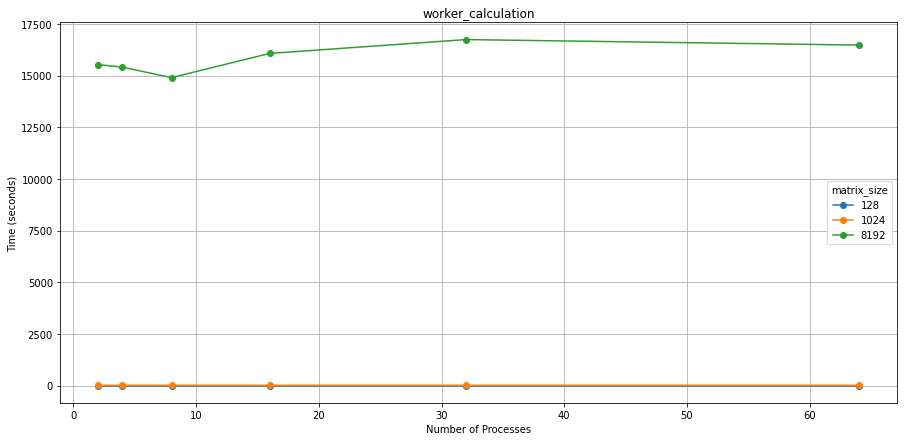

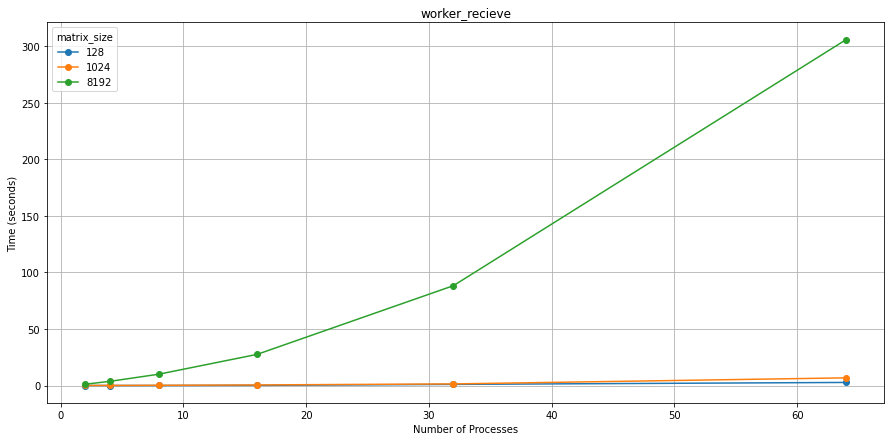

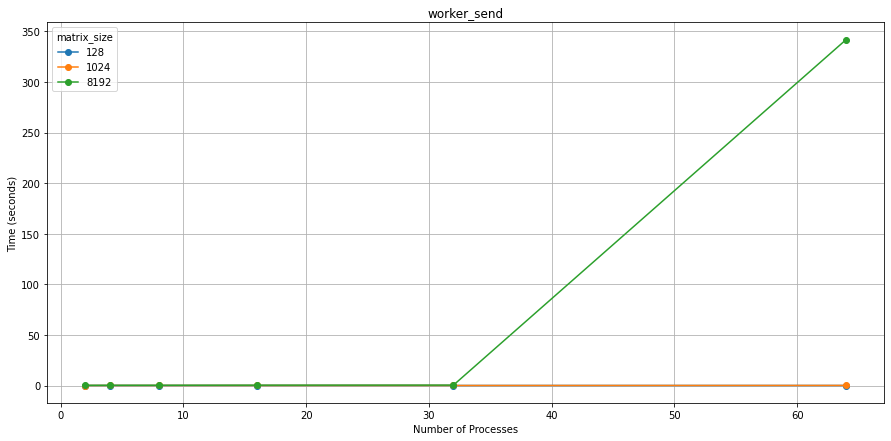

In [38]:
# From starter code, mainly used for master graphs
for algorithm in tk.graph.traverse():
    plot_pandas(
        df=tk.dataframe.loc[algorithm, "Total time"].unstack(level="array_size"),
        title=algorithm.frame["name"],
        xlabel="Number of Processes",
        ylabel="Time (seconds)",
    )

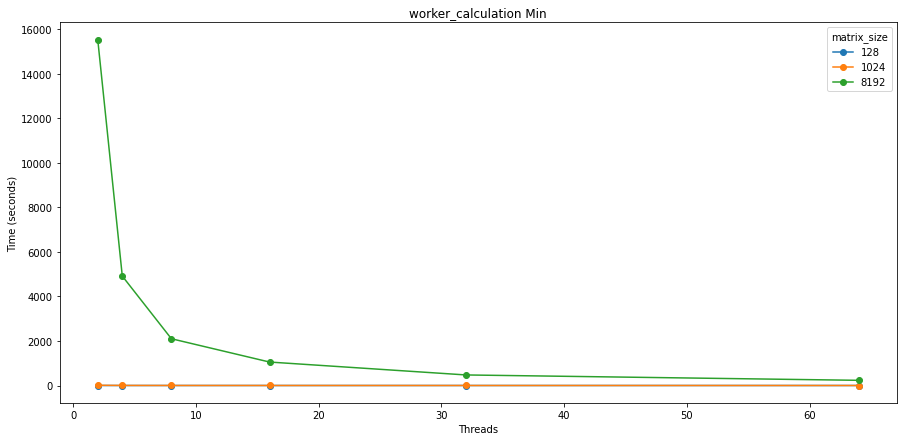

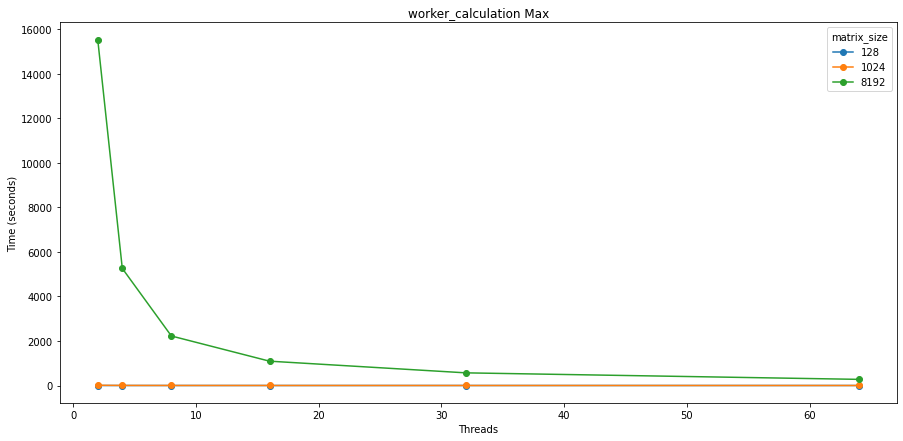

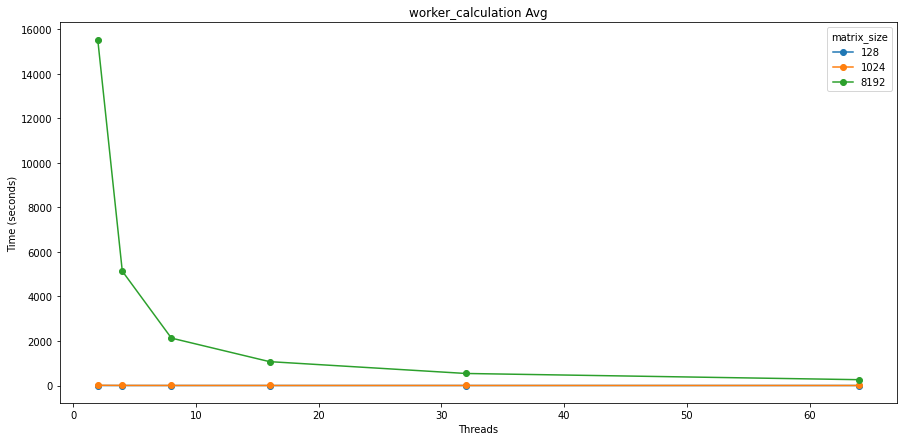

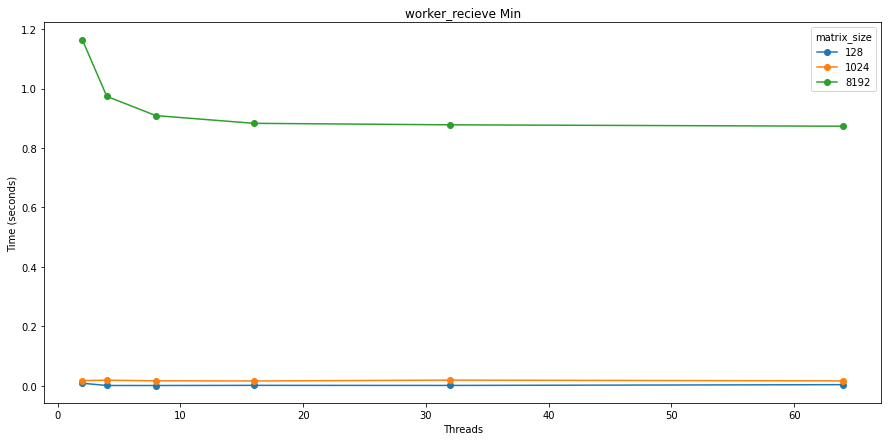

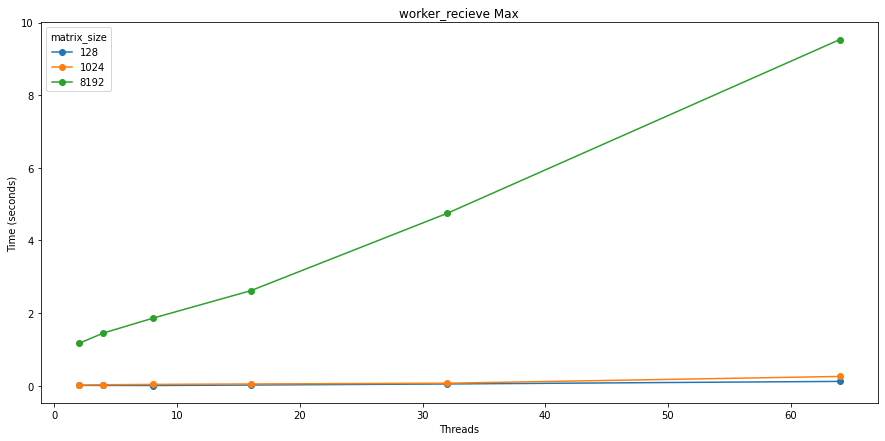

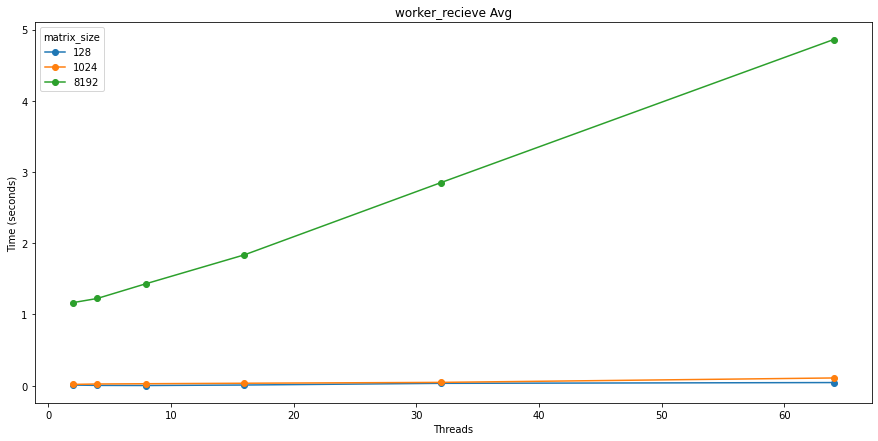

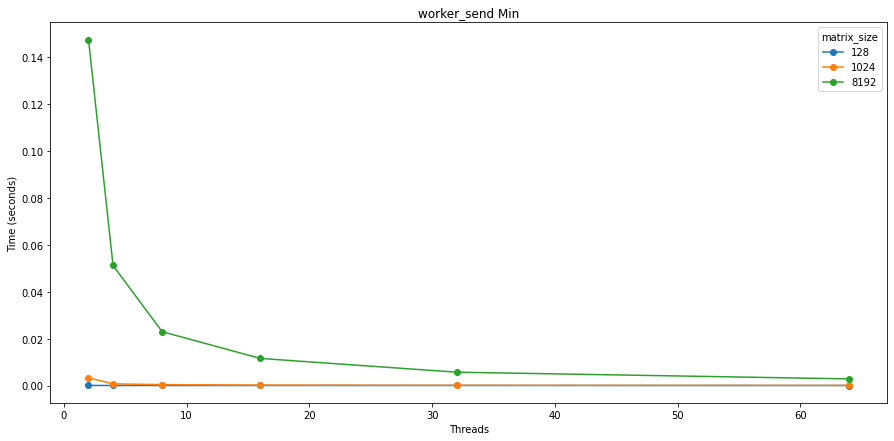

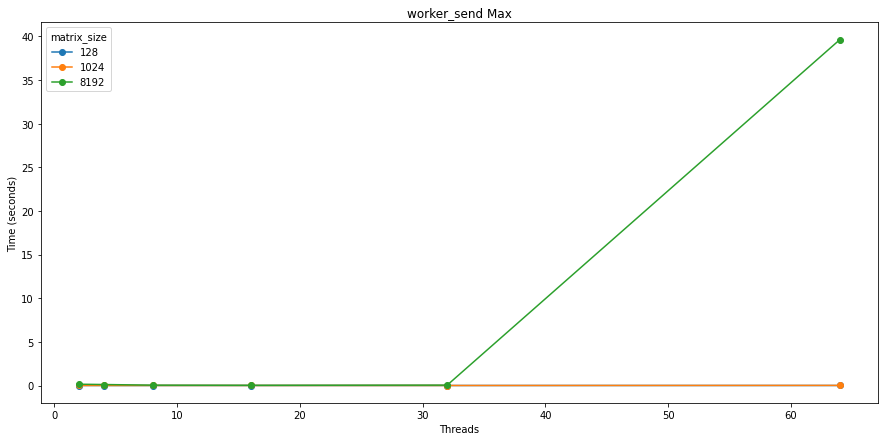

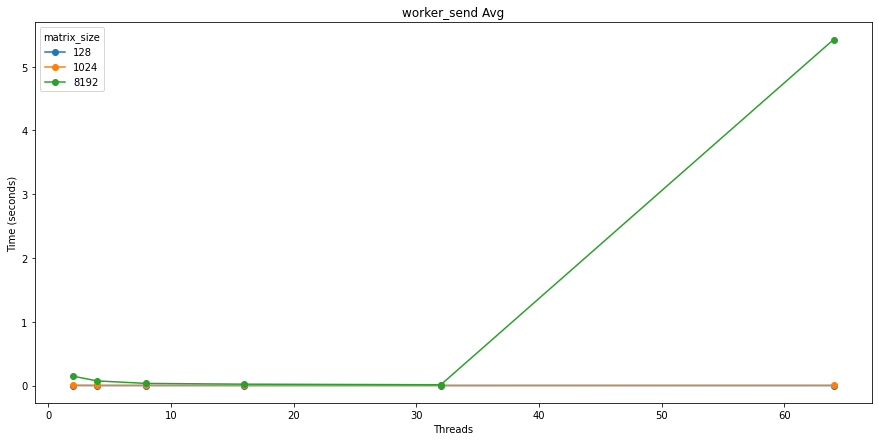

In [24]:
# plot min, max, avg
for node in tk.graph.traverse():
    if node.frame["name"] == 'worker_recieve' or node.frame["name"] == 'worker_calculation' or node.frame["name"] == 'worker_send':
        plot_pandas(
            df=tk.dataframe.loc[node, "Min time/rank"].unstack(level="array_size"),
            title=node.frame["name"] + " Min",
            xlabel="Number of Processes",
            ylabel="Time (seconds)",
        )
        plot_pandas(
            df=tk.dataframe.loc[node, "Max time/rank"].unstack(level="array_size"),
            title=node.frame["name"] + " Max",
            xlabel="Number of Processes",
            ylabel="Time (seconds)",
        )
        plot_pandas(
            df=tk.dataframe.loc[node, "Avg time/rank"].unstack(level="array_size"),
            title=node.frame["name"] + " Avg",
            xlabel="Number of Processes",
            ylabel="Time (seconds)",
        )

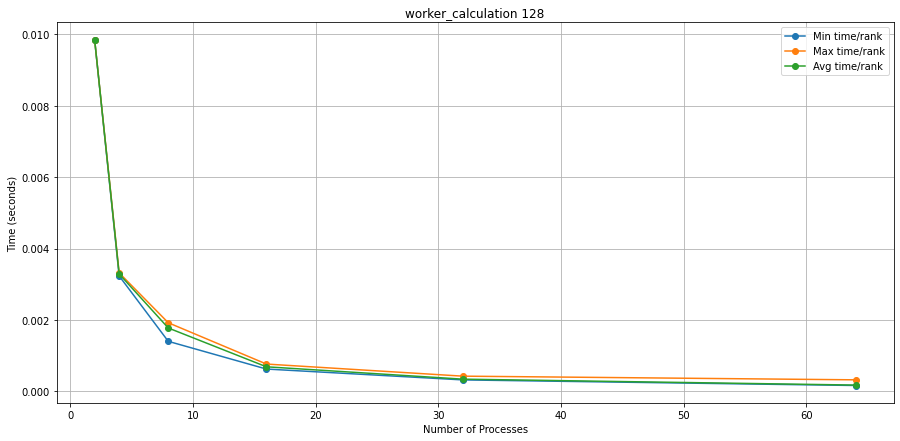

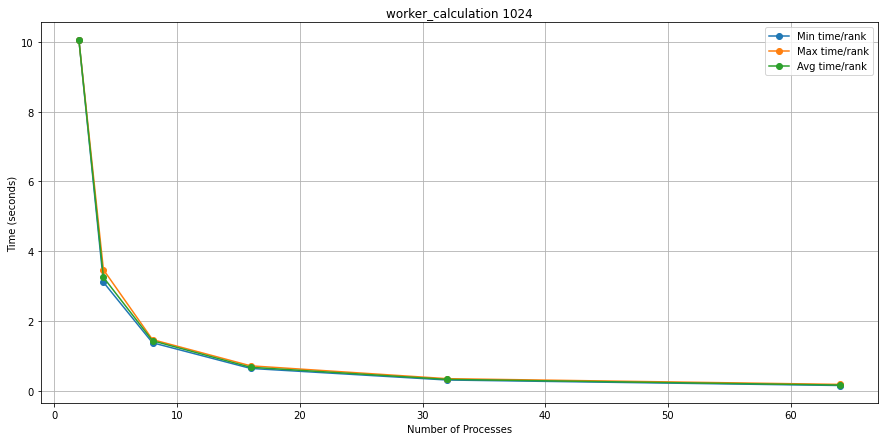

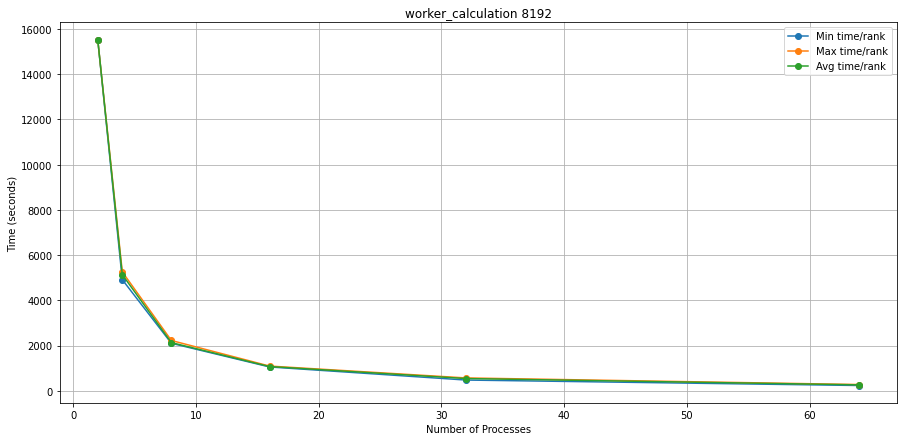

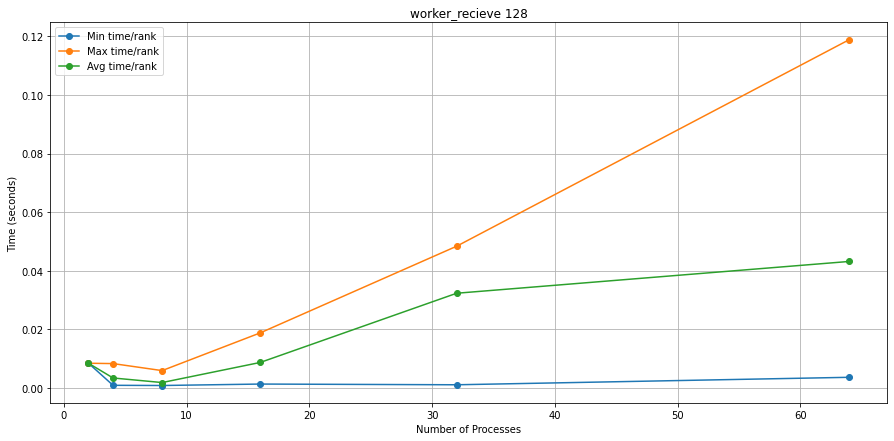

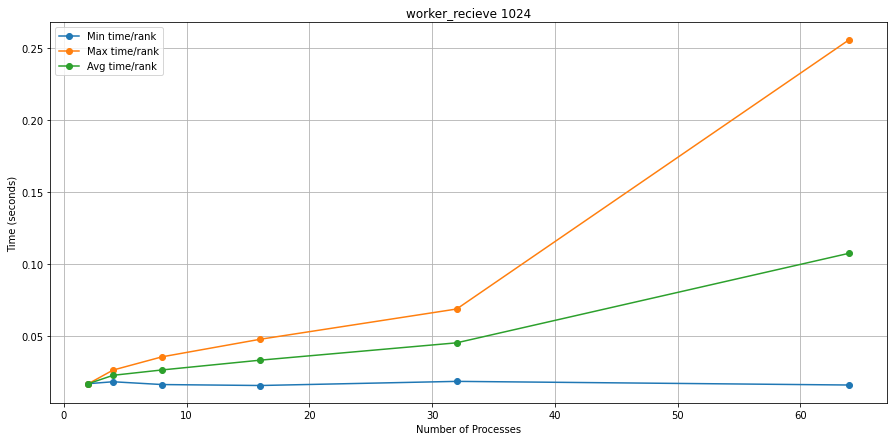

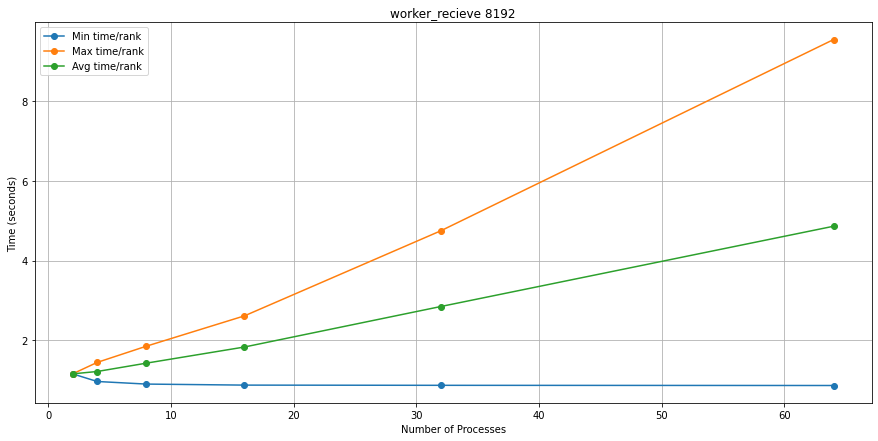

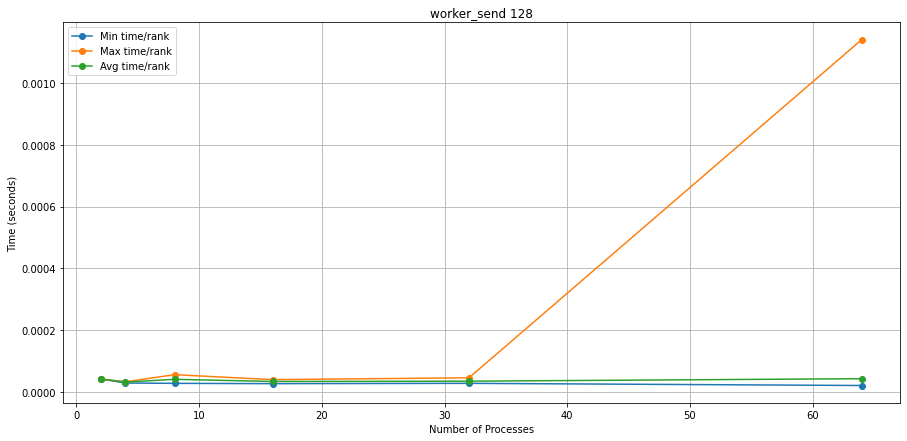

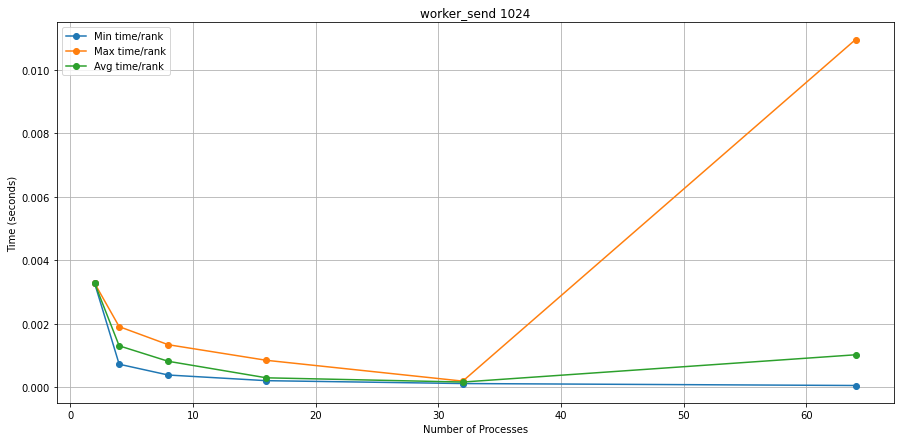

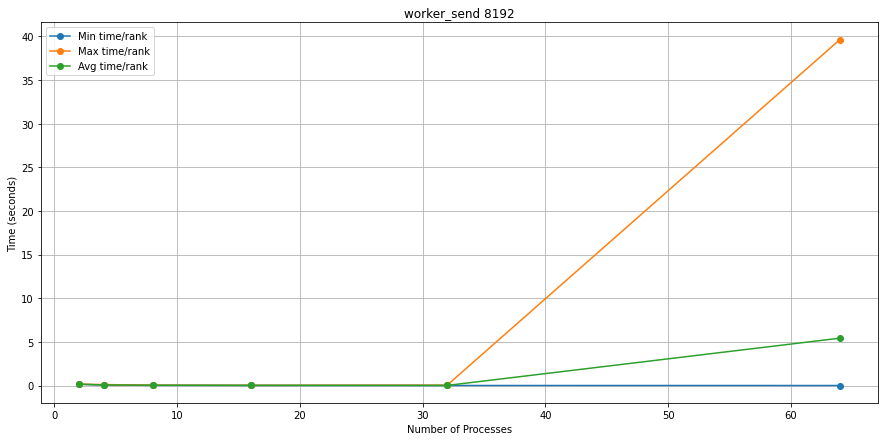

In [36]:
# MAIN GRAPHS FOR WORKERS
# separate graphs by matrix sizes and plot max, min, avg
grouped = tk.dataframe.groupby(['node', 'array_size'])
# print(grouped)

for (node, array_size), group in grouped:
    if node.frame["name"] != 'worker_recieve' and node.frame["name"] != 'worker_calculation' and node.frame["name"] != 'worker_send':
        continue

    # Sort the groups by number of processes to match x axis values
    group_sorted = group.sort_values(by='num_procs')
    plt.figure(figsize=(15, 7))

    # Plot times
    plt.plot(processes, group_sorted['Min time/rank'], label='Min time/rank', marker='o')
    plt.plot(processes, group_sorted['Max time/rank'], label='Max time/rank', marker='o')
    plt.plot(processes, group_sorted['Avg time/rank'], label='Avg time/rank', marker='o')
    
    plt.title(node.frame["name"] + " " + str(array_size))
    plt.xlabel('Number of Processes')
    plt.ylabel('Time (seconds)')
    plt.legend()

    # Add grid for better readability
    plt.grid(True)
    plt.show()


In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(array_size)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    ax.set_xticklabels(threads)
    plt.show()
    return fig, ax

NameError: name 'matrix_sizes' is not defined

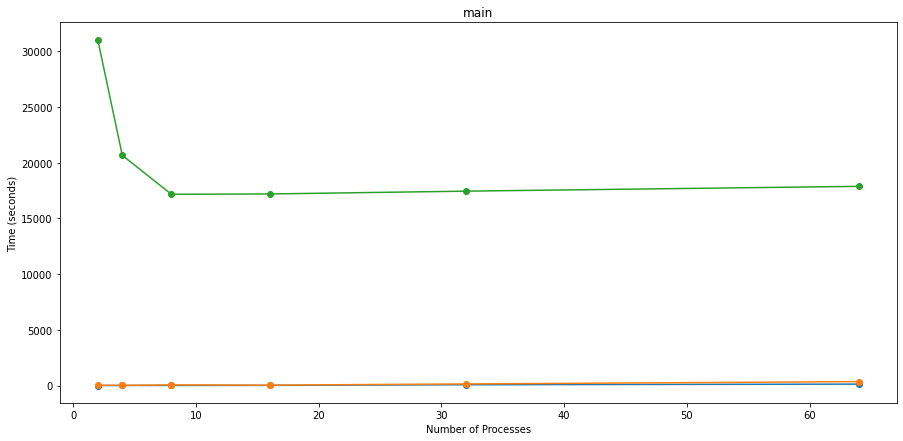

In [16]:
for node in tk.graph.traverse():
    plot_mpl(
        df=tk.dataframe.loc[node, "Total time"].unstack(level="array_size"),
        title=node.frame["name"],
        xlabel="Number of Processes",
        ylabel="Time (seconds)",
    )